Enter initial ball height (meters): 0
Enter initial ball speed (m/s): 1
Enter initial angle (degrees): 45
Add air resistance? (Yes: 1 No: 0)1
Enter timestep dt in seconds: .01
Maximum range is 0.11 meters
Time of flight is 0.2 seconds


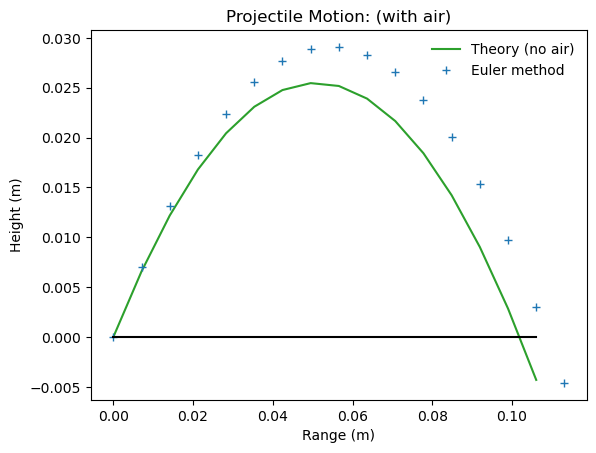

In [1]:
# Balle - Program to compute the trajectory of a baseball using the Euler method.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt

# Set initial position and velocity of the baseball
y0 = eval(input('Enter initial ball height (meters): '))
r0 = np.array([0., y0])  # Initial vector position
speed = eval(input('Enter initial ball speed (m/s): '))
theta = eval(input('Enter initial angle (degrees): '))

v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
r = np.copy(r0)  # Set initial position
v = np.copy(v0)  # Set initial velocity

# Set physical parameters (mass, Cd, etc.)
Cd = 0.35  # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
mass = 0.145   # Mass of projectile (kg)
grav = 9.81    # Gravitational acceleration (m/s^2)

# Set air resistance flag
airFlag = eval(input('Add air resistance? (Yes: 1 No: 0)'))
if airFlag == 0:
    rho = 0.       # No air resistance
    air_text = '(no air)'
else:
    rho = 1.2     # Density of air (kg/m^3)
    air_text = '(with air)'
air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

# * Loop until ball hits ground or max steps completed
tau = eval(input('Enter timestep dt in seconds: '))  # (sec)
maxstep = 1000
laststep = maxstep

# Set up arrays for data
xplot = np.empty(maxstep)
yplot = np.empty(maxstep)

x_noAir = np.empty(maxstep)
y_noAir = np.empty(maxstep)

for istep in range(maxstep):
    t = istep * tau  # Current time

    # Record computed position for plotting
    xplot[istep] = r[0]
    yplot[istep] = r[1]

    x_noAir[istep] = r0[0] + v0[0]*t
    y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

    # Calculate the acceleration of the ball
    accel = air_const * np.linalg.norm(v) * v  # Air resistance
    accel[1] = accel[1] - grav # update y acceleration to include gravity

    # Calculate the new position and velocity using Euler's method.
    r = r + tau * v  # Euler step
    v = v + tau * accel

    # If the ball reaches the ground (i.e. y < 0), break out of the loop
    if r[1] < 0:
        laststep = istep + 1
        xplot[laststep] = r[0]  # Record last values completed
        yplot[laststep] = r[1]

        # x_noAir[laststep] = r0[0] + v0[0] * t
        # y_noAir[laststep] = r0[1] + v0[1] * t - 0.5 * grav * t ** 2
        break  # Break out of the for loop

# Print maximum range and time of flight
print('Maximum range is {0:.2f} meters'.format(r[0]))
print('Time of flight is {0:.1f} seconds'.format(laststep * tau))

# Graph the trajectory of the baseball
fig, ax = plt.subplots()
ax.set_title('Projectile Motion: ' + air_text)
ax.plot(x_noAir[:laststep], y_noAir[:laststep], '-', c='C2', label='Theory (no air)')
ax.plot(xplot[:laststep+1], yplot[:laststep+1], '+', label='Euler method')
# Mark the location of the ground by a straight line
ax.plot(np.array([0.0, x_noAir[laststep-1]]), np.array([0.0, 0.0]), '-', color='k')
ax.legend(frameon=False)
ax.set_xlabel('Range (m)')
ax.set_ylabel('Height (m)')

plt.show()

In [ ]:
#Question 1, fitting quadratic equation.

# Set up configuration options and special features
from pylab import *

#from nm4p.linreg import linreg
#from nm4p.pollsf import pollsf

def dinput(input_text) :
    return int(input(input_text))

def finput(input_text) :
    return float(input(input_text))

def ainput(input_prompt) :
    '''
    Function to convert user input of a list or tuple of values to a numpy array.
    Input format can be like "1,2" or "[1,2]" or "(1,2)" etc
    '''
    return(array(eval(input(input_prompt))))

def linreg(x,y,sigma):
    """Function to perform straight-line linear regression
       Inputs
        x       Independent variable
        y       Dependent variable
        sigma   Estimated error in y
       Outputs
        a_fit   Fit parameters; a(1) is intercept, a(2) is slope
        sig_a   Estimated error in the parameters a()
        yy      Curve fit to the data
        chisqr  Chi squared statistic
    """

    #* Evaluate various sigma sums
    s = 0.; sx = 0.; sy = 0.; sxy = 0.; sxx = 0.
    for i in range(len(x)):
        sigmaTerm = sigma[i]**(-2)
        s += sigmaTerm
        sx += x[i] * sigmaTerm
        sy += y[i] * sigmaTerm
        sxy += x[i] * y[i] * sigmaTerm
        sxx += x[i]**2 * sigmaTerm
    denom = s*sxx - sx**2

    #* Compute intercept a_fit(1) and slope a_fit(2)
    a_fit = empty(2)
    a_fit[0] = (sxx*sy - sx*sxy)/denom
    a_fit[1] = (s*sxy - sx*sy)/denom

    #* Compute error bars for intercept and slope
    sig_a = empty(2)
    sig_a[0] = sqrt(sxx/denom)
    sig_a[1] = sqrt(s/denom)

    #* Evaluate curve fit at each data point and compute Chi^2
    yy = empty(len(x))
    chisqr = 0.
    for i in range(len(x)):
        yy[i] = a_fit[0] + a_fit[1]*x[i]          # Curve fit to the data
        chisqr += ( (y[i]-yy[i])/sigma[i] )**2    # Chi square
    return [a_fit, sig_a, yy, chisqr]

def pollsf(x, y, sigma, M):
    """Function to fit a polynomial to data
       Inputs 
        x       Independent variable
        y       Dependent variable
        sigma   Estimate error in y
        M       Number of parameters used to fit data
       Outputs
        a_fit   Fit parameters; a(1) is intercept, a(2) is slope
        sig_a   Estimated error in the parameters a()
        yy      Curve fit to the data
        chisqr  Chi squared statistic
    """

    #* Form the vector b and design matrix A   
    N = len(x)
    b = empty(N)
    A = empty((N,M))
    for i in range(N):
        b[i] = y[i]/sigma[i]
        for j in range(M):
            A[i,j] = x[i]**j / sigma[i]

    #* Compute the correlation matrix C 
    C = inv( transpose(A) @ A )

    #* Compute the least squares polynomial coefficients a_fit
    a_fit = C @ ( transpose(A) @ transpose(b) ) 

    #* Compute the estimated error bars for the coefficients
    sig_a = empty(M)
    for j in range(M):
        sig_a[j] = sqrt(C[j,j])

    #* Evaluate curve fit at each data point and compute Chi^2
    yy = zeros(N)
    chisqr = 0
    for i in range(N):
        for j in range(M):
            yy[i] += a_fit[j]*x[i]**j   # yy is the curve fit
        chisqr += ((y[i]-yy[i]) / sigma[i])**2

    return [a_fit, sig_a, yy, chisqr]

#* Initialize data to be fit. Data is quadratic plus random number.
print('Curve fit data is created using the quadratic')
print('  y(x) = c(0) + c(1)*x + c(2)*x**2')
c = ainput('Enter the coefficients as [c(0), c(1), c(2)]: ')
N = len(xplot[:laststep])        # Number of data points
x = xplot[:laststep]    # x = [0, 1, ..., N-1]
dy = ones(N) * finput('Enter estimated error bar: ') # constant error-bars
seed(0)           # Initialize random number generator
y = c[0] + c[1]*x + c[2]*x**2
y += normal(0,dy) # add simulated measurement errors (Gaussian distributed random vector)

#* Fit the data to a straight line or a more general polynomial
M = dinput('Enter number of fit parameters (= 2 for line): ')
if M == 2 :  
    #* straight line fit
    [a_fit, sig_a, yy, chisqr] = linreg(x, y, dy)
else: 
    #* Polynomial fit
    [a_fit, sig_a, yy, chisqr] = pollsf(x, y, dy, M)
    
#* Print out the fit parameters, including their error bars.
print('Fit parameters:')
for i in range(M):
    print('a[%d] = %.5f +/- %.5f' % (i,a_fit[i],sig_a[i]))
    
# Use built-in numpy function:
deg = M - 1
params, cov = polyfit(x,y,deg,w=1/dy,cov=True)
dparams = sqrt( diag( cov ))
print('polyval best-fit parameters: ', params)
# variance in parameters from diagonal of covariance matrix:
print('parameter uncertainties: ', dparams)

# construct best-fitting model
xmod = linspace(min(x),max(x),100)
ymod = polyval(params,xmod)

rcParams.update({'font.size': 20})

#* Graph the data, with error bars, and fitting function.
fig1 = figure(figsize=(10,8))
errorbar(xplot[:laststep],yplot[:laststep],dy,fmt='o',ms=10,label='data $y_i$')   # Graph data with error bars
plot(x,yy,'-',lw=2,label='model $Y(x)$')            # Plot the fit on same graph as data
plot(xmod,ymod,'--',lw=2,label='polyfit model') # polyfit result
xlabel('$x_i$')  
ylabel('$y_i$ and $Y(x)$')
legend(loc='best')
title('$\chi^2 = %d, \,   N-M = %d$' % (chisqr, N-M) )
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks

Curve fit data is created using the quadratic
  y(x) = c(0) + c(1)*x + c(2)*x**2


### xplot[:laststep+1]